In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

In [3]:
df = pd.read_csv('Crime_Reports_20240701.csv')


In [6]:
df['Date of Report'] = pd.to_datetime(df['Date of Report'])
df['Crime Date Time'] = pd.to_datetime(df['Crime Date Time'], errors='coerce')


<ipython-input-6-3b0359f48c42>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Crime Date Time'] = pd.to_datetime(df['Crime Date Time'], errors='coerce')


In [8]:
df['Year'] = df['Date of Report'].dt.year
df['Month'] = df['Date of Report'].dt.month
df['Day'] = df['Date of Report'].dt.day
df['Hour'] = df['Crime Date Time'].dt.hour

In [9]:
df.dropna(subset=['Crime', 'Neighborhood', 'Year', 'Month', 'Hour'], inplace=True)


In [10]:
df['Crime_Type'] = pd.factorize(df['Crime'])[0]

In [11]:
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(df[['Year', 'Month', 'Day', 'Hour']])


In [13]:
X = df[['Year', 'Month', 'Day', 'Hour']]
y = df['Crime_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.03      0.04      0.03       123
           1       0.03      0.04      0.04       208
           2       0.13      0.14      0.14      1175
           3       0.20      0.20      0.20       693
           4       0.07      0.08      0.07       767
           5       0.13      0.13      0.13       988
           6       0.05      0.05      0.05       434
           7       0.09      0.09      0.09       899
           8       0.05      0.05      0.05       175
           9       0.05      0.05      0.05       184
          10       0.00      0.00      0.00       105
          11       0.03      0.03      0.03       238
          12       0.01      0.01      0.01        74
          13       0.01      0.01      0.01       158
          14       0.00      0.00      0.00        18
          15       0.04      0.04      0.04       477
          16       0.00      0.00      0.00        22
          17       0.04    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


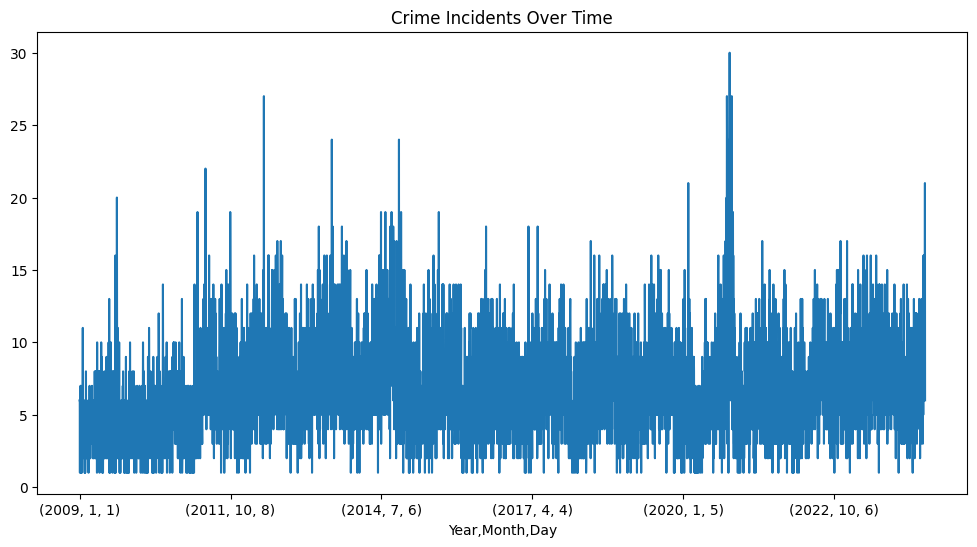

In [16]:
crime_time_series = df.groupby(['Year', 'Month', 'Day'])['Crime'].count()
crime_time_series.plot(figsize=(12,6), title="Crime Incidents Over Time")
plt.show()


In [17]:
import joblib
joblib.dump(clf, 'crime_pattern_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [18]:
from google.colab import files

# Download the saved models
files.download('crime_pattern_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>